# Creating the QM7 dataset

### THIS is the code to hack around creating the function to write out the file. 

You will want to run ./dataset_creator/QM7.py to make the actual file and use this to hack around other datasets

Task: calculated atomic energy

we will use the 3D coords from the sdf file for the rotamers, and the SMILES strings for the conformers. Using the smiles strings from the csv file, as the ones in the frame had a very strange result for one of the compounds. I suspect hte SMILES in the sdf was created from the 3d structure. The dsf result gives CH2 and 2 H radicals???? the csv formula is methane.

In sdf: [H].[H].[H][C][H] 
In csv: C([H])([H])([H])[H]

In [121]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot
import matplotlib.tri 
import rdkit.Chem
import rdkit.Chem.AllChem as Chem
import rdkit.Chem.AllChem as AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
import mpl_toolkits.mplot3d
import operator
import functools
import os
import gif
import h5py
import scipy.linalg
import slugify
import sys
import random

from skspatial.objects import Point, Vector, Triangle
from operator import attrgetter
from scipy.constants import golden
from IPython.display import HTML

import projection
from projection.molecule import Molecule
from projection.sdf_molecule import SDFMolecule
from projection.face import Face

from projection.ico import Ico

In [122]:
## as using mat files
import scipy.io
from rdkit.Chem import PandasTools
import pandas as pd
import os
from rdkit import RDConfig

In [123]:
save_dir=r'F:\Nextcloud\science\Datasets\icostar_processed'
data_dir=r'F:\Nextcloud\science\Datasets'
### SMILES strings
input_file='qm7.csv'
input_file_location=os.path.join(data_dir, input_file)
df = pd.read_csv(input_file_location)
df.head()
### 3D coords
test_file='qm7.mat'
sdf_file = 'gdb7.sdf'
sdf_file_location = os.path.join(data_dir, sdf_file)

mat_location = os.path.join(data_dir, test_file)
mat = scipy.io.loadmat(mat_location)

In [124]:
mat['X'][0].shape

(23, 23)

In [125]:
frame['SMILES']

0                                       [H].[H].[H][C][H]
1                            [H]C([H])([H])C([H])([H])[H]
2                                     [H]C([H])=C([H])[H]
3                                               [H]C#C[H]
4                           [H]OC([H])([H])C([H])([H])[H]
                              ...                        
7164    [H]C([H])=C(C([H])([H])C([H])([H])[H])[C@]([H]...
7165    [H]C([H])=C(C([H])([H])C#N)C([H])([H])C([H])([...
7166    [H]/C(=C(\C#N)C([H])([H])C([H])([H])[H])C([H])...
7167    [H]C([H])=C1C([H])([H])C([H])=C([H])[C@]1([H])...
7168    [H]C1([H])C([H])([H])C([H])([H])C2(C1([H])[H])...
Name: SMILES, Length: 6838, dtype: object

In [126]:
len(df)

6834

In [127]:
df.keys()

Index(['smiles', 'u0_atom'], dtype='object')

In [128]:
frame['ID'][88]

'gdb7k_0088.xyz'

In [129]:
print(df['smiles'].iloc[6833])
print(frame['SMILES'][7167])

[H]C([H])=C(C([H])([H])C([H])([H])[H])C([H])(N([H])[H])C([H])([H])[H]
[H]C([H])=C1C([H])([H])C([H])=C([H])[C@]1([H])C([H])([H])[H]


In [130]:
def Load_SDF_Files(sdf_file):
    """Loads SDF files using pandas and some sensible settings"""
    PandasTools.ChangeMoleculeRendering(renderer='String')
    frame = PandasTools.LoadSDF(
        sdf_file,
        smilesName='SMILES',
        molColName='Molecule',
        includeFingerprints=True, 
        removeHs=False, 
        strictParsing=False, 
        embedProps=True )
    return frame

frame = Load_SDF_Files(sdf_file_location)

In [131]:
frame['ID'][87]

KeyError: 87

In [ ]:
m=SDFMolecule(
    molecule = frame['Molecule'][0],
    smiles = frame['SMILES'][0],
    do_random_rotation=False, 
    rotation_vector=[])
m

In [ ]:
# stuff to get things ready
#df['Compound ID'] = [x for x in range(len(df))]
SMILES_array=frame['SMILES']
SMILES_array

In [ ]:
csv_file_location=os.path.join(data_dir, 'gdb7.sdf.csv')
csv_file = pd.read_csv(csv_file_location)

In [132]:
df.tail()

,smiles,u0_atom
6829,[H]C(=C(C#N)C([H])([H])[H])C([H])([H])C([H])([...,-1919.54
6830,[H]C(=C([H])C([H])(N([H])[H])C([H])([H])[H])C(...,-1657.63
6831,[H]C(=C([H])C([H])([H])C([H])([H])[H])C([H])([...,-1662.10
6832,[H]C([H])=C(C([H])([H])C([H])([H])[H])C([H])([...,-1782.01
6833,[H]C([H])=C(C([H])([H])C([H])([H])[H])C([H])(N...,-1919.00


In [133]:
frame.tail()

,ID,SMILES,Molecule
7164,gdb7k_7160.xyz,[H]C([H])=C(C([H])([H])C([H])([H])[H])[C@]([H]...,<rdkit.Chem.rdchem.Mol object at 0x0000024C9D5...
7165,gdb7k_7161.xyz,[H]C([H])=C(C([H])([H])C#N)C([H])([H])C([H])([...,<rdkit.Chem.rdchem.Mol object at 0x0000024C9D5...
7166,gdb7k_7162.xyz,[H]/C(=C(\C#N)C([H])([H])C([H])([H])[H])C([H])...,<rdkit.Chem.rdchem.Mol object at 0x0000024C9D5...
7167,gdb7k_7163.xyz,[H]C([H])=C1C([H])([H])C([H])=C([H])[C@]1([H])...,<rdkit.Chem.rdchem.Mol object at 0x0000024C9D5...
7168,gdb7k_7164.xyz,[H]C1([H])C([H])([H])C([H])([H])C2(C1([H])[H])...,<rdkit.Chem.rdchem.Mol object at 0x0000024C9D5...


In [134]:
print(Chem.CanonSmiles(frame['SMILES'][7164]))

C=C(CC)[C@@H](C)N


In [135]:
canon=set([Chem.CanonSmiles(df['smiles'][x]) for x in range(0,6833)])

In [136]:
rounds=set([Chem.CanonSmiles(x) for x in frame['SMILES']])

In [137]:
misses=[x for x in rounds if x in canon]

In [138]:
len(misses)

3208

In [139]:
frame['Molecule'][0].GetPropNames()

<rdkit.rdBase._vectclass std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> > at 0x24c9ca4b750>

## Tests that the molecules are loaded correctly etc

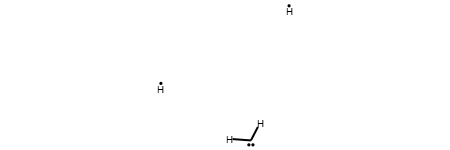

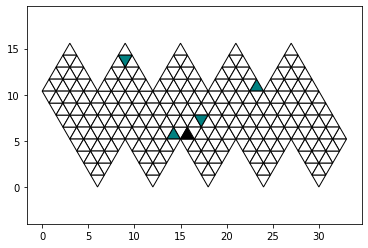

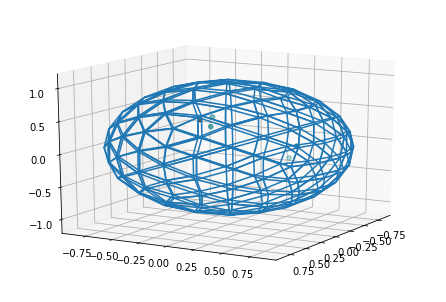

In [140]:
idx=0
#print(df[['Compound ID']].iloc[idx])
# This optimises and does adds Hs, also rotates and centers the molecule
m=Molecule(frame[['SMILES']].iloc[idx][0])
# creates the ico projection object
i = Ico(m,2)
# draws a 2D unfolding
i.draw2D()
# draws a 3D unfolding
i.draw3D()
# gives the chemical structure in standard format
m.molecule

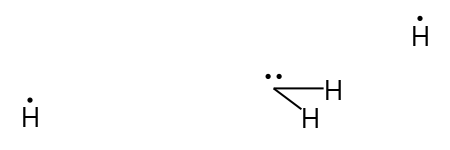

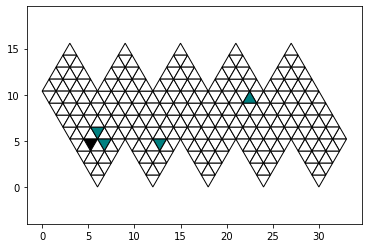

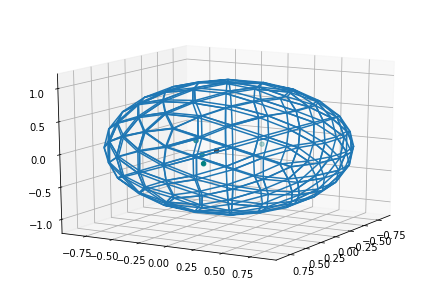

In [141]:
idx=0
#rint(df[['Compound ID']].iloc[idx])
# This optimises and does adds Hs, also rotates and centers the molecule
m=SDFMolecule(
    molecule = frame['Molecule'][idx],
    smiles = frame['SMILES'][idx],
    do_random_rotation=False, 
    rotation_vector=[])
# creates the ico projection object
i = Ico(m,2)
# draws a 2D unfolding
i.draw2D()
# draws a 3D unfolding
i.draw3D()
# gives the chemical structure in standard format
m.molecule

In [142]:
idx=0
print(df[['Compound ID']].iloc[idx])
# This optimises and does adds Hs, also rotates and centers the molecule
m=Molecule(df[['smiles']].iloc[idx][0])
# creates the ico projection object
i = Ico(m,2)
# draws a 2D unfolding
i.draw2D()
# draws a 3D unfolding
i.draw3D()
# gives the chemical structure in standard format
m.molecule

KeyError: "None of [Index(['Compound ID'], dtype='object')] are in the [columns]"

In [149]:
df['Compound ID'] = [x for x in range(len(df))] #frame['ID']
df.head()

,smiles,u0_atom,Compound ID
0,C([H])([H])([H])[H],-417.96,0
1,[H]C([H])([H])C([H])([H])[H],-712.42,1
2,[H]C([H])=C([H])[H],-564.21,2
3,[H]C#C[H],-404.88,3
4,[H]OC([H])([H])C([H])([H])[H],-808.87,4


In [144]:
frame.columns

Index(['ID', 'SMILES', 'Molecule'], dtype='object')

In [145]:
outfile.close()
outfile_expanded.close()
#hf.close()

NameError: name 'outfile' is not defined

In [146]:
SMILES_array=df['smiles']
SMILES_array[4]

'[H]OC([H])([H])C([H])([H])[H]'

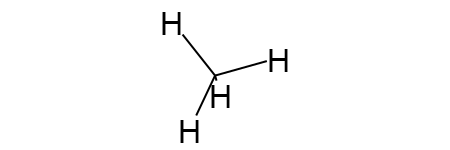

In [147]:
smiles_string=SMILES_array[0]
base_m = rdkit.Chem.MolFromSmiles(smiles_string, sanitize=True)
base_m.UpdatePropertyCache()
rdkit.Chem.AllChem.EmbedMolecule(base_m)
# Add the hydrogens
molecule = rdkit.Chem.AddHs(base_m)
rdkit.Chem.AllChem.EmbedMolecule(molecule)
# use MMFF94 to minimise and make a nice structure
rdkit.Chem.AllChem.MMFFOptimizeMolecule(molecule)
base_m
molecule

In [148]:
df.head()

,smiles,u0_atom,Compound ID
0,C([H])([H])([H])[H],-417.96,gdb7k_0000.xyz
1,[H]C([H])([H])C([H])([H])[H],-712.42,gdb7k_0001.xyz
2,[H]C([H])=C([H])[H],-564.21,gdb7k_0002.xyz
3,[H]C#C[H],-404.88,gdb7k_0003.xyz
4,[H]OC([H])([H])C([H])([H])[H],-808.87,gdb7k_0004.xyz


##### Code to write out the commands for the script
Yes I am sure there is a better way to do this

In [10]:
#### This writes out the commands we need, so we can copy and paste below
## there must be a better way of doing this!
def df_maker(column_list, verbose=True):    
    for header in column_list:
        # this makes the dfs
        cmd = "%s_ds = %s%s%s" % (
                slugify.slugify(header, separator="_"), 
                "outfile.create_dataset('",
                header, 
                "', (smile_count*NUM_MAPS_PER_MOLECULE,))")
        if verbose:
            print(cmd)
    return cmd

def df_writer(column_list,current_row):
    verbose=True
    for header in column_list:
        # this makes the dfs
        cmd1 = "%s = %s%s%s" % (
                slugify.slugify(header, separator="_"), 
                "current_row.iloc[0]['",
                header, 
                "']")
        cmd2 = "%s_ds[point_ptr] = %s" % (
                slugify.slugify(header, separator="_"),
                slugify.slugify(header, separator="_"))

        if verbose:
            print(cmd1)
            print(cmd2)
    return (cmd1, cmd2)

In [33]:
#df_maker(column_list=df.columns, verbose=True)

smiles_ds = outfile.create_dataset('smiles', (smile_count*NUM_MAPS_PER_MOLECULE,))
u0_atom_ds = outfile.create_dataset('u0_atom', (smile_count*NUM_MAPS_PER_MOLECULE,))
compound_id_ds = outfile.create_dataset('Compound ID', (smile_count*NUM_MAPS_PER_MOLECULE,))


"compound_id_ds = outfile.create_dataset('Compound ID', (smile_count*NUM_MAPS_PER_MOLECULE,))"

#### The function to write the hdf5 file

In [153]:
def Create_Diff_Conformer_Dataset_From_QM7(DIVISION, 
                   save_dir, 
                   data_dir, 
                   out_filename, 
                   do_Hdonors,
                   ico_key_name,
                   num_of_molecules_override=0,
                   NUM_MAPS_PER_MOLECULE=60,
                   sanitize=True,
                   SMILES_array=[],
                   num_out_files=1,
                   extra_augmentation='conformer',
                   rotamer_source='df',
                   conformer_source='df',
                   verbose=False):
    """ Creates the dataset as a hdf5 file
    QM7 has both smiles and 3d coords
    DIVISION =4 # for the size of icospehre  
    save_dir=r'C:\\Users\\ella_\\Nextcloud\\science\\Datasets\\converted_pdbbind\\v2015'
    data_dir=r'C:\\Users\\ella_\\Nextcloud\\science\\Datasets\\pdbbind\\v2015'
    out_filename = "PDBBindLigands_core_augmented_withHs_withHdonors_div4.hdf5"
    do_Hdonors = True/False, whether to do the H donor data or not, don't do it for proteins
    ico_key_name_name = "icosahedron_level4"
    num_of_molecules_override: 0, how many molecules to do, a setting of 0 does all of them
    NUM_MAPS_PER_MOLECULE # how many maps to create, anything over 60 will be augmented
    sanitize=True
    SMILES_array= an array of smiles, set this up from df or fix this 
    num_out_files=1 not yet implemented
    extra_augmentation='conformer' other options not yet implemented!
    verbose=False
    """
    if True:  
        if num_of_molecules_override == 0:
            # do all smiles woo
            Num_of_molecules= len(SMILES_array)
        else:
            Num_of_molecules = num_of_molecules_override

        smiles_count = Num_of_molecules
        smile_count = Num_of_molecules # yeah i know, is hacky

        if DIVISION == 1:
            NUM_FACES = 80
        elif DIVISION == 2:
            NUM_FACES = 320
        elif DIVISION == 3:
            NUM_FACES = 1280
        elif DIVISION == 4:
            NUM_FACES = 5120

        if NUM_MAPS_PER_MOLECULE == 1:
            NUM_UNWRAPPINGS_TO_DO = 1
            NUM_DIRECTIONS_TO_DO = 1
            NUM_EXTRA_MAPS_PER_MOLECULE = 0
        elif NUM_MAPS_PER_MOLECULE == 60:
            NUM_UNWRAPPINGS_TO_DO = 20
            NUM_DIRECTIONS_TO_DO = 3
            NUM_EXTRA_MAPS_PER_MOLECULE = 0
        elif NUM_MAPS_PER_MOLECULE > 60:
            # Currently assumes you want 60 plus extra
            NUM_UNWRAPPINGS_TO_DO = 20
            NUM_DIRECTIONS_TO_DO = 3
            NUM_EXTRA_MAPS_PER_MOLECULE = NUM_MAPS_PER_MOLECULE-60
            if verbose:
                print('Doing {} extra maps using {}s'.format(
                    NUM_EXTRA_MAPS_PER_MOLECULE, 
                    extra_augmentation))  

        if sanitize:
            print('Warning! Sanitize seems to muck up the structures, especially for protiens')
            print('Is good for SMILES string input however')
            print('Will override sanitize option for the 3D structures')

        outfile = h5py.File(os.path.join(save_dir,out_filename),"w")
        if NUM_EXTRA_MAPS_PER_MOLECULE > 0:
            outfile_expanded = h5py.File(os.path.join(save_dir,out_filename + '_extra_' + extra_augmentation),"w")
        string_type = h5py.string_dtype(encoding='utf-8')
        icosahedron_name = ico_key_name

        ##################### set up the out put datasets ################################
        ## this sets up the output datasets
        icosahedron_ds =  outfile.create_dataset(icosahedron_name, (smile_count*NUM_MAPS_PER_MOLECULE, NUM_FACES, 3))  
        ## from the dataset
        u0_atom_ds = outfile.create_dataset('u0_atom', (smile_count*NUM_MAPS_PER_MOLECULE,))
        compound_id_ds = outfile.create_dataset('Compound ID', (smile_count*NUM_MAPS_PER_MOLECULE,), dtype=string_type)
        smiles_ds = outfile.create_dataset('smiles', (smile_count*NUM_MAPS_PER_MOLECULE,), dtype=string_type)
        ### end from the dataset
        ### start calculated by rdkit
        num_atoms_ds = outfile.create_dataset("num_atoms", (smile_count*NUM_MAPS_PER_MOLECULE,))
        num_bonds_ds = outfile.create_dataset("num_bonds", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
        num_heavy_atoms_ds = outfile.create_dataset("num_heavy_atoms", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
        num_exact_Mol_Wt_ds = outfile.create_dataset("num_exact_Mol_Wt", (smile_count*NUM_MAPS_PER_MOLECULE,))
        MolLogP_ds = outfile.create_dataset("MolLogP", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
        if do_Hdonors:
            num_H_acceptors_ds = outfile.create_dataset("num_H_acceptors", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
            num_H_donors_ds = outfile.create_dataset("num_H_donors", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
        num_heteroatoms_ds = outfile.create_dataset("num_ heteroatoms", (smile_count*NUM_MAPS_PER_MOLECULE,))
        num_valence_electrons_ds = outfile.create_dataset("num_valence_electrons", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
        PMI_1_ds = outfile.create_dataset("PMI_1", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
        PMI_2_ds = outfile.create_dataset("PMI_2", (smile_count*NUM_MAPS_PER_MOLECULE,))
        PMI_3_ds = outfile.create_dataset("PMI_3", (smile_count*NUM_MAPS_PER_MOLECULE,))
        spherocity_ds = outfile.create_dataset("spherocity", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
        asphericity_ds = outfile.create_dataset("asphericity", (smile_count*NUM_MAPS_PER_MOLECULE,))
        eccentricity_ds = outfile.create_dataset("eccentricity", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
        inertial_shape_factor_ds = outfile.create_dataset("inertial_shape_factor", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
        radius_of_gyration_ds = outfile.create_dataset("radius_of_gyration", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
        # copied from output of df_maker above sigh
        ### end from the dataset

        ######################### start the loop ###################################
        ## Das Loop
        point_ptr = -1                                               
        for mol_idx in range(Num_of_molecules): 
            if mol_idx % 50 == 0:
                print('Got to Molecule no. ', mol_idx)
            ##### grab data from the dataframe
            current_row = df.loc[[mol_idx]]    
            ##### grab a molecule! #####################################
            if rotamer_source == 'frame':
                # taking data from the sdf file, good 3D data, bad SMILES
                m=SDFMolecule(
                    molecule = frame['Molecule'][mol_idx],
                    smiles = SMILES_array[mol_idx],
                    do_random_rotation=False, 
                    rotation_vector=[])
            elif rotamer_source == 'df':
                # taking data from the csv file, good SMILES, no 3D data
                m=Molecule(SMILES_array[mol_idx],sanitize=sanitize)
            tidy_m = m
            #tidy_m.molecule.UpdatePropertyCache() # this is now done in Molecule if you got SMILEs
            ############### put molecule in an icosasphere #############
            # puts the molecule into an icosasphere
            i = Ico(m,DIVISION)
            print(df['Compound ID'].iloc[mol_idx])
            if smiles_count > 0:
                smiles_string = SMILES_array[mol_idx]
            #############################################################################################
            ################################### THIS IS THE FIRST 60 NETS ###############################
            #############################################################################################
            for face_idx in range(NUM_UNWRAPPINGS_TO_DO): 
                for point_idx in range(NUM_DIRECTIONS_TO_DO): 
                    point_ptr += 1
                    #### create the map (this does not plot a graphics object)
                    i.plot2D(first_face=face_idx, point_idx=point_idx);
                    fs=i.get_face_list()
                    #i.draw2D()
                    #### ####### grab the atom values or colours or whatever############
                    Face._lookup_func = Face.face_get_masses
                    values = [f.get_values() for f in fs]
                    ################ create the measurables you want to record #############
                    values_as_array = np.array(values) # this is hte icosahedron stuff
                    num_atoms = tidy_m.molecule.GetNumAtoms() # number of atoms
                    num_bonds = tidy_m.molecule.GetNumBonds() # number of bonds
                    num_heavy_atoms = tidy_m.molecule.GetNumHeavyAtoms() # number of non-hydrogens
                    num_exact_Mol_Wt = Descriptors.ExactMolWt(tidy_m.molecule) # exact molar weight
                    MolLogP = Descriptors.MolLogP(tidy_m.molecule, includeHs=True) # octanol / water partitian coefficient
                    num_heteroatoms = Descriptors.NumHeteroatoms(tidy_m.molecule)
                    num_valence_electrons = Descriptors.NumValenceElectrons(tidy_m.molecule)
                    if do_Hdonors:
                        num_H_acceptors = Descriptors.NumHAcceptors(tidy_m.molecule)
                        num_H_donors = Descriptors.NumHDonors(tidy_m.molecule)
                    PMI_1 = rdMolDescriptors.CalcPMI1(tidy_m.molecule) # principal moment of inertia 1 (smallest)
                    PMI_2 = rdMolDescriptors.CalcPMI2(tidy_m.molecule) # principal moment of inertia 2
                    PMI_3 = rdMolDescriptors.CalcPMI3(tidy_m.molecule) # principal moment of inertia 3
                    spherocity = rdMolDescriptors.CalcSpherocityIndex(tidy_m.molecule)
                    asphericity = rdMolDescriptors.CalcAsphericity(tidy_m.molecule)
                    eccentricity = rdMolDescriptors.CalcEccentricity(tidy_m.molecule)
                    inertial_shape_factor = rdMolDescriptors.CalcInertialShapeFactor(tidy_m.molecule)
                    radius_of_gyration = rdMolDescriptors.CalcRadiusOfGyration(tidy_m.molecule)

                    ############ assign measurabless to columns ##########################
                    ###### assign unfolding net
                    icosahedron_ds[point_ptr] = values_as_array 
                    ###### assign stuff from the database
                    compound_id = current_row.iloc[0]['Compound ID']
                    compound_id_ds[point_ptr] = compound_id
                    u0_atom = current_row.iloc[0]['u0_atom']
                    u0_atom_ds[point_ptr] = u0_atom
                    smiles = current_row.iloc[0]['smiles']
                    smiles_ds[point_ptr] = smiles
                    ######## assign stuff you calculated ######
                    num_atoms_ds[point_ptr] = num_atoms  
                    num_bonds_ds[point_ptr] = num_bonds 
                    num_heavy_atoms_ds[point_ptr] =  num_heavy_atoms 
                    num_exact_Mol_Wt_ds[point_ptr] =  num_exact_Mol_Wt
                    MolLogP_ds[point_ptr] =  MolLogP 
                    if do_Hdonors:
                        num_H_acceptors_ds[point_ptr] =  num_H_acceptors 
                        num_H_donors_ds[point_ptr] =  num_H_donors 
                    num_heteroatoms_ds[point_ptr] =  num_heteroatoms
                    num_valence_electrons_ds[point_ptr] =  num_valence_electrons 
                    PMI_1_ds[point_ptr] =  PMI_1 
                    PMI_2_ds[point_ptr] =  PMI_2
                    PMI_3_ds[point_ptr] =  PMI_3
                    spherocity_ds[point_ptr] =  spherocity 
                    asphericity_ds[point_ptr] =  asphericity
                    eccentricity_ds[point_ptr] =  eccentricity 
                    inertial_shape_factor_ds[point_ptr] =  inertial_shape_factor 
                    radius_of_gyration_ds[point_ptr] =  radius_of_gyration 
            if verbose:
                print('Finished the 60 standard unfoldings')
            #############################################################################################
            ######################## THE EXTRA AUGMENTATION STARTS HERE !################################
            #############################################################################################
            ### !!! Here we use SMILES strings not 3D coordinates ####
            for extra_idx in range(NUM_EXTRA_MAPS_PER_MOLECULE):
                ## this is it, regen the molecule each time you unwrap to move it about a bit!
                if conformer_source == 'frame':
                    # taking data from the sdf file, good 3D data, bad SMILES
                    m=SDFMolecule(
                        molecule = frame['Molecule'][mol_idx],
                        smiles = SMILES_array[mol_idx],
                        do_random_rotation=False, 
                        rotation_vector=[])
                elif conformer_source == 'df':
                    # taking data from the csv file, good SMILES, no 3D data
                    m=Molecule(SMILES_array[mol_idx],sanitize=sanitize)
                    #print(m.molecule)
                tidy_m = m
                for point_idx in range(1): # hacky cos I didn't want to indent!!!!!
                    # we pick the face and direction randomly for this single unfolding
                    face_idx = random.choices([x for x in range(NUM_UNWRAPPINGS_TO_DO)], k=1)[0]
                    point_idx = random.choices([x for x in range(NUM_DIRECTIONS_TO_DO)], k=1)[0]
                    if verbose:
                        print('Doing extra: face {}, direction {}'.format(face_idx, point_idx))
                    point_ptr += 1
                    #### create the map (this does not plot a graphics object)
                    i.plot2D(first_face=face_idx, point_idx=point_idx);
                    fs=i.get_face_list()
                    #i.draw2D()
                    #### ####### grab the atom values or colours or whatever############
                    Face._lookup_func = Face.face_get_masses
                    values = [f.get_values() for f in fs]
                    ################ create the measurables you want to record #############
                    values_as_array = np.array(values) # this is hte icosahedron stuff
                    num_atoms = tidy_m.molecule.GetNumAtoms() # number of atoms
                    num_bonds = tidy_m.molecule.GetNumBonds() # number of bonds
                    num_heavy_atoms = tidy_m.molecule.GetNumHeavyAtoms() # number of non-hydrogens
                    num_exact_Mol_Wt = Descriptors.ExactMolWt(tidy_m.molecule) # exact molar weight
                    MolLogP = Descriptors.MolLogP(tidy_m.molecule, includeHs=True) # octanol / water partitian coefficient
                    num_heteroatoms = Descriptors.NumHeteroatoms(tidy_m.molecule)
                    num_valence_electrons = Descriptors.NumValenceElectrons(tidy_m.molecule)
                    if do_Hdonors:
                        num_H_acceptors = Descriptors.NumHAcceptors(tidy_m.molecule)
                        num_H_donors = Descriptors.NumHDonors(tidy_m.molecule)
                    PMI_1 = rdMolDescriptors.CalcPMI1(tidy_m.molecule) # principal moment of inertia 1 (smallest)
                    PMI_2 = rdMolDescriptors.CalcPMI2(tidy_m.molecule) # principal moment of inertia 2
                    PMI_3 = rdMolDescriptors.CalcPMI3(tidy_m.molecule) # principal moment of inertia 3
                    spherocity = rdMolDescriptors.CalcSpherocityIndex(tidy_m.molecule)
                    asphericity = rdMolDescriptors.CalcAsphericity(tidy_m.molecule)
                    eccentricity = rdMolDescriptors.CalcEccentricity(tidy_m.molecule)
                    inertial_shape_factor = rdMolDescriptors.CalcInertialShapeFactor(tidy_m.molecule)
                    radius_of_gyration = rdMolDescriptors.CalcRadiusOfGyration(tidy_m.molecule)

                    ############ assign measurabless to columns ##########################
                    ###### assign unfolding net
                    icosahedron_ds[point_ptr] = values_as_array 
                    #charge_ds[point_ptr] = charge
                    ###### assign stuff from the database
                    compound_id = current_row.iloc[0]['Compound ID']
                    compound_id_ds[point_ptr] = compound_id
                    u0_atom = current_row.iloc[0]['u0_atom']
                    u0_atom_ds[point_ptr] = u0_atom
                    smiles = current_row.iloc[0]['smiles']
                    smiles_ds[point_ptr] = smiles
                    ######## assign stuff you calculated ######
                    num_atoms_ds[point_ptr] = num_atoms  
                    num_bonds_ds[point_ptr] = num_bonds 
                    num_heavy_atoms_ds[point_ptr] =  num_heavy_atoms 
                    num_exact_Mol_Wt_ds[point_ptr] =  num_exact_Mol_Wt
                    MolLogP_ds[point_ptr] =  MolLogP 
                    if do_Hdonors:
                        num_H_acceptors_ds[point_ptr] =  num_H_acceptors 
                        num_H_donors_ds[point_ptr] =  num_H_donors 
                    num_heteroatoms_ds[point_ptr] =  num_heteroatoms
                    num_valence_electrons_ds[point_ptr] =  num_valence_electrons 
                    PMI_1_ds[point_ptr] =  PMI_1 
                    PMI_2_ds[point_ptr] =  PMI_2
                    PMI_3_ds[point_ptr] =  PMI_3
                    spherocity_ds[point_ptr] =  spherocity 
                    asphericity_ds[point_ptr] =  asphericity
                    eccentricity_ds[point_ptr] =  eccentricity 
                    inertial_shape_factor_ds[point_ptr] =  inertial_shape_factor 
                    radius_of_gyration_ds[point_ptr] =  radius_of_gyration 


        outfile.close()   
        outfile_expanded.close()
        i.draw2D()

        return

## THIS DOES THE DATASET BUILDING! 

Warning! Sanitize seems to muck up the structures, especially for protiens
Is good for SMILES string input however
Will override sanitize option for the 3D structures
Got to Molecule no.  0
0
1
2
3
4


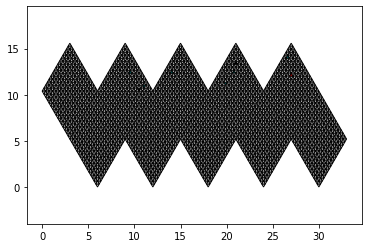

In [154]:
out_filename='QM7_test.hdf5'
Create_Diff_Conformer_Dataset_From_QM7(DIVISION=4, 
                   save_dir=save_dir, 
                   data_dir=data_dir, 
                   out_filename=out_filename, 
                   do_Hdonors=True,
                   ico_key_name="icosahedron_level4",
                   num_of_molecules_override=5,
                   NUM_MAPS_PER_MOLECULE=120,
                   sanitize=True,
                   SMILES_array=SMILES_array,
                   num_out_files=1,
                   extra_augmentation='conformer',
                   rotamer_source='df',
                   conformer_source='df',
                   verbose=False)
 

In [133]:
outfile.close()
hf.close()

## Test stuff
this allows you to check that the hdf5 has been made correctly

In [102]:
os.path.join(save_dir,out_filename)

'F:\\Nextcloud\\science\\Datasets\\icostar_processed\\TEST5.hdf5'

In [163]:
out_filename='TEST5.hdf5'
print(save_dir,out_filename)
#infile = "PDBBindTEST_div4.hdf5"
#h5py.File(os.path.join(save_dir,out_filename),"w")
hf1 = h5py.File(os.path.join(save_dir,out_filename), 'r')
#n1 = hf['num_exact_Mol_Wt']
#print(n1.value)
#print(len(n1))
print(hf1['Compound ID'])
hf1.keys()
#hf.close()

F:\Nextcloud\science\Datasets\icostar_processed TEST5.hdf5
<HDF5 dataset "Compound ID": shape (325,), type "|O">


<KeysViewHDF5 ['Compound ID', 'MolLogP', 'PMI_1', 'PMI_2', 'PMI_3', 'asphericity', 'eccentricity', 'icosahedron_level4', 'inertial_shape_factor', 'num_ heteroatoms', 'num_H_acceptors', 'num_H_donors', 'num_atoms', 'num_bonds', 'num_exact_Mol_Wt', 'num_heavy_atoms', 'num_valence_electrons', 'radius_of_gyration', 'smiles', 'spherocity', 'u0_atom']>

In [164]:
hf1.keys()

<KeysViewHDF5 ['Compound ID', 'MolLogP', 'PMI_1', 'PMI_2', 'PMI_3', 'asphericity', 'eccentricity', 'icosahedron_level4', 'inertial_shape_factor', 'num_ heteroatoms', 'num_H_acceptors', 'num_H_donors', 'num_atoms', 'num_bonds', 'num_exact_Mol_Wt', 'num_heavy_atoms', 'num_valence_electrons', 'radius_of_gyration', 'smiles', 'spherocity', 'u0_atom']>

In [165]:
egg=hf1['icosahedron_level4'].value

C:\Users\ella_\.conda\envs\icosohedron_projection\lib\site-packages\ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


In [166]:
egg

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [167]:
hf1['u0_atom'].value

C:\Users\ella_\.conda\envs\icosohedron_projection\lib\site-packages\ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


array([-417.96, -417.96, -417.96, -417.96, -417.96, -417.96, -417.96,
       -417.96, -417.96, -417.96, -417.96, -417.96, -417.96, -417.96,
       -417.96, -417.96, -417.96, -417.96, -417.96, -417.96, -417.96,
       -417.96, -417.96, -417.96, -417.96, -417.96, -417.96, -417.96,
       -417.96, -417.96, -417.96, -417.96, -417.96, -417.96, -417.96,
       -417.96, -417.96, -417.96, -417.96, -417.96, -417.96, -417.96,
       -417.96, -417.96, -417.96, -417.96, -417.96, -417.96, -417.96,
       -417.96, -417.96, -417.96, -417.96, -417.96, -417.96, -417.96,
       -417.96, -417.96, -417.96, -417.96, -417.96, -417.96, -417.96,
       -417.96, -417.96, -712.42, -712.42, -712.42, -712.42, -712.42,
       -712.42, -712.42, -712.42, -712.42, -712.42, -712.42, -712.42,
       -712.42, -712.42, -712.42, -712.42, -712.42, -712.42, -712.42,
       -712.42, -712.42, -712.42, -712.42, -712.42, -712.42, -712.42,
       -712.42, -712.42, -712.42, -712.42, -712.42, -712.42, -712.42,
       -712.42, -712

In [168]:
hf1['MolLogP'].value

C:\Users\ella_\.conda\envs\icosohedron_projection\lib\site-packages\ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


array([ 0.6361,  0.6361,  0.6361,  0.6361,  0.6361,  0.6361,  0.6361,
        0.6361,  0.6361,  0.6361,  0.6361,  0.6361,  0.6361,  0.6361,
        0.6361,  0.6361,  0.6361,  0.6361,  0.6361,  0.6361,  0.6361,
        0.6361,  0.6361,  0.6361,  0.6361,  0.6361,  0.6361,  0.6361,
        0.6361,  0.6361,  0.6361,  0.6361,  0.6361,  0.6361,  0.6361,
        0.6361,  0.6361,  0.6361,  0.6361,  0.6361,  0.6361,  0.6361,
        0.6361,  0.6361,  0.6361,  0.6361,  0.6361,  0.6361,  0.6361,
        0.6361,  0.6361,  0.6361,  0.6361,  0.6361,  0.6361,  0.6361,
        0.6361,  0.6361,  0.6361,  0.6361,  0.6361,  0.6361,  0.6361,
        0.6361,  0.6361,  1.0262,  1.0262,  1.0262,  1.0262,  1.0262,
        1.0262,  1.0262,  1.0262,  1.0262,  1.0262,  1.0262,  1.0262,
        1.0262,  1.0262,  1.0262,  1.0262,  1.0262,  1.0262,  1.0262,
        1.0262,  1.0262,  1.0262,  1.0262,  1.0262,  1.0262,  1.0262,
        1.0262,  1.0262,  1.0262,  1.0262,  1.0262,  1.0262,  1.0262,
        1.0262,  1.0

In [169]:
hf1.close()